In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\ashok.thirunavukaras\Mall_Customers.csv')

In [3]:
data.shape

(202, 5)

In [4]:
data.head(25)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83
200,200,Male,30,137,83


In [6]:
print(data.to_string())

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Female   58                  20   

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              202 non-null    int64 
 1   Gender                  202 non-null    object
 2   Age                     202 non-null    int64 
 3   Annual Income (k$)      202 non-null    int64 
 4   Spending Score (1-100)  202 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.0+ KB


In [8]:
x=data.iloc[:,[3,4]].values

In [9]:
from sklearn.cluster import KMeans
wcss = []

In [10]:
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [11]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [12]:
import warnings
warnings.filterwarnings('ignore')

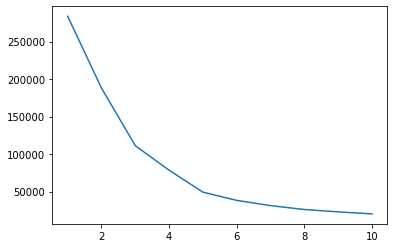

In [14]:
plt.plot(range(1,11),wcss)

Text(0, 0.5, 'Within cluster sum of squares')

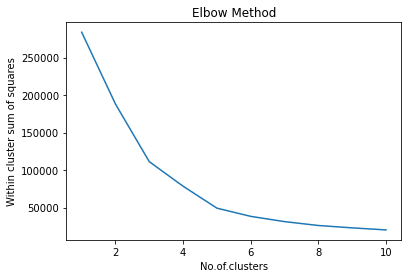

In [15]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No.of.clusters")
plt.ylabel("Within cluster sum of squares")

In [16]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [17]:
y_kmeans = kmeansmodel.fit_predict(x)

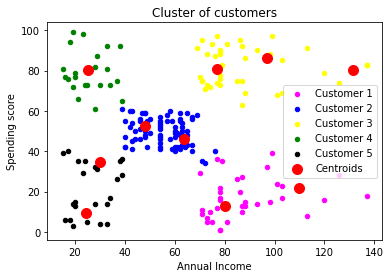

In [18]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s= 20, c='magenta', label='Customer 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s= 20, c='blue', label='Customer 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s= 20, c='yellow', label='Customer 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s= 20, c='green', label='Customer 4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s= 20, c='black', label='Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c = 'red', label='Centroids')
plt.title("Cluster of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

In [19]:
print(data.to_string())

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Female   58                  20   